<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [1]:
# standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. Report any notable findings.

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [2]:
df = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
df.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [4]:
df.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
df[["sale_date"]].value_counts()

sale_date                   
Mon May 19 00:00:00 EDT 2008    268
Fri May 16 00:00:00 EDT 2008    264
Tue May 20 00:00:00 EDT 2008    177
Wed May 21 00:00:00 EDT 2008    158
Thu May 15 00:00:00 EDT 2008    118
dtype: int64

**Directly above, I am checking to see if there are any NaN cells in any of the columns in the dataset.
There do not seem to be any.**

In [7]:
df[["state"]].value_counts()

state
CA       984
AC         1
dtype: int64

**How possbile listed in the data set in AC have only 0ne?**

In [8]:
# I want to check zip code, street,city (From the above, I also notice that the sq_ft
# and price are both negative. I also notice that the latitude and longitude have been switched) #
df[df['state'] == 'AC']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [9]:
# Check zip code of AC with CA, So I am assuming this is a typo and should be 'CA'.
df[df['zip'] == '95835']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [10]:
df['state'] = 'CA'

In [11]:
df['state'].value_counts()

CA    985
Name: state, dtype: int64

In [12]:
df.loc[703,'price'] = abs(df.loc[703,'price'])

In [13]:
df.loc[703,'price']

210944

In [14]:
df.loc[703,'sq__ft'] = abs(df.loc[703,'sq__ft'])

In [15]:
df.loc[703,'sq__ft']

984

In [16]:
should_long = df.loc[703,'latitude']

In [17]:
should_lat = df.loc[703,'longitude']

In [18]:
df.loc[703,'longitude'] = should_long

In [19]:
df.loc[703,'latitude'] = should_lat

In [20]:
# The latitude and longitude have been switched.
df[(df['latitude'] == should_lat) & (df['longitude'] == should_long)]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,CA,1,1,984,Condo,Fri May 16 00:00:00 EDT 2008,210944,38.668433,-121.503471


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [21]:
new_df = df.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

In [22]:
new_df = pd.read_csv('./datasets/sacramento_cleaned_dataframe.csv')
new_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [23]:
new_df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'EL DORADO HILLS', 'RANCHO MURIETA', 'WILTON',
       'GREENWOOD', 'FAIR OAKS', 'CAMERON PARK', 'LINCOLN', 'PLACERVILLE',
       'MEADOW VISTA', 'ROSEVILLE', 'ROCKLIN', 'AUBURN', 'LOOMIS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'FORESTHILL',
       'DIAMOND SPRINGS', 'SHINGLE SPRINGS', 'COOL', 'WALNUT GROVE',
       'GARDEN VALLEY', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [24]:
new_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

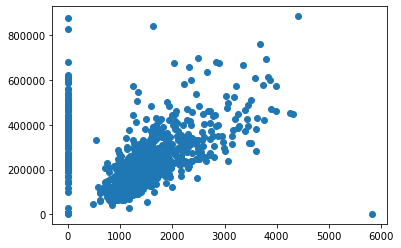

In [25]:
plt.scatter(x=new_df['sq__ft'], y=new_df['price']);


In [26]:
new_df = new_df[(new_df.sq__ft > 0)]
new_df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,814.0000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,95761.4914,3.244472,1.960688,1591.146192,229448.369779,38.577044,-121.378687
std,85.3440,0.852137,0.669804,663.841930,119825.576060,0.126315,0.119736
min,95603.0000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.0000,3.000000,2.000000,1144.000000,148750.000000,38.473885,-121.451501
50%,95820.0000,3.000000,2.000000,1418.500000,207986.500000,38.591720,-121.405456
75%,95828.0000,4.000000,2.000000,1851.000000,284973.250000,38.674704,-121.325844
max,95864.0000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


**I'm going to make the assumption that listings where sq. ft. = 0 and price > 0 are an error in the data.Therefore, I will drop the rows where the sq. ft. is 0, since it will considerably skew/manipulate the Beta for sq.ft.**

In [27]:

new_df[new_df['sq__ft'] == 0].head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


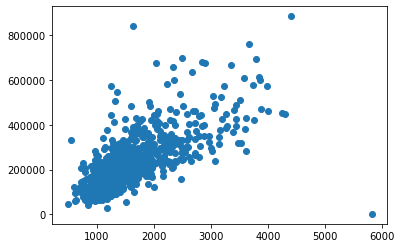

In [28]:
plt.scatter(x=new_df['sq__ft'], y=new_df['price']);

**It seems like there is an error in on of the home's sq_ft. recording as it is listed around -1000.**

> There are multiple homes listed as having 0 sq_ft., which may be correct for one or two of the listings (those with a price near 0), but for the homes that are listed as having 0 sq. ft. but range between 5,000 and 100,000, I find this very unlikely, unless it is a plot of land that is being sold and not a home.

> There is a home listed as having nearly 6000 square feet, which would make it the largest in the data set, yet its price is near 0 either the price or the sq_ft. of this home were entered incorrectly.

> I notice a positive, linear correlation between sq. ft. and price, which makes sense.

In [29]:
new_df[new_df['sq__ft'] == 0].count()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [30]:
new_df.count()

street       814
city         814
zip          814
state        814
beds         814
baths        814
sq__ft       814
type         814
sale_date    814
price        814
latitude     814
longitude    814
dtype: int64

In [31]:
new_df.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

**Answer:**

>The variables I believe are predictors of price are:
    >1. zip
    >2. beds
    >3. sq__ft
    >4. type
    >5. baths
    >6. street

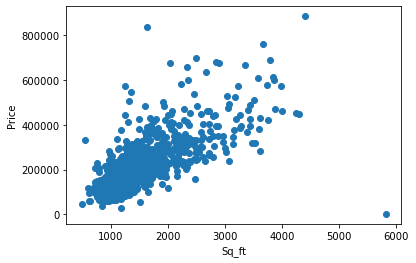

In [32]:
plt.scatter(x=new_df['sq__ft'], y=new_df['price']);
plt.xlabel('Sq_ft')
plt.ylabel('Price');

In [33]:
def lin_rel_plot(x, y):
    plt.scatter(x, y);

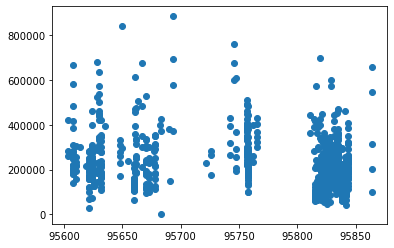

In [34]:
lin_rel_plot(x=new_df['zip'], y=new_df['price'])

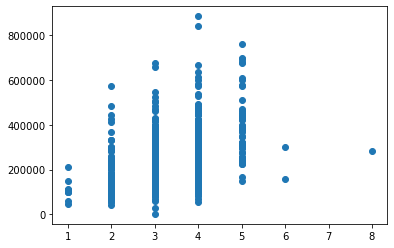

In [35]:
lin_rel_plot(x=new_df['beds'], y=new_df['price'])

In [36]:
# lin_rel_plot(x=new_df['sale_date'], y=new_df['price'])

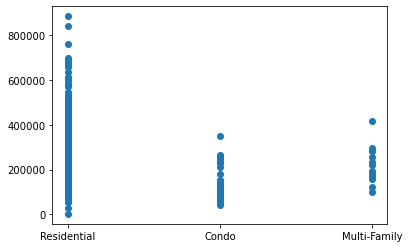

In [37]:
lin_rel_plot(x=new_df['type'], y=new_df['price'])

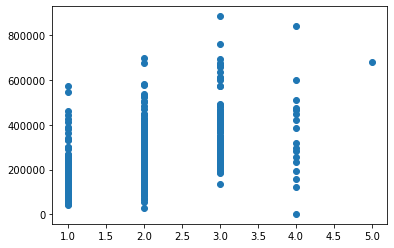

In [38]:
lin_rel_plot(x=new_df['baths'], y=new_df['price'])

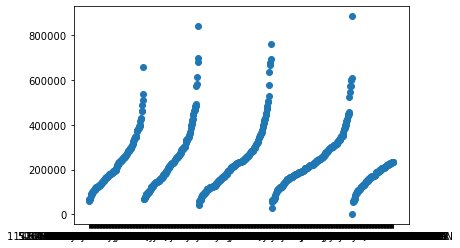

In [39]:
lin_rel_plot(x=new_df['street'], y=new_df['price']);

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

 **Answer:**

It seems like sq. ft. is the best predictor of Y.  The other potential predictors that I listed do not have linear relationships with Y, therefore, I wouldn't be comfortable using them as predictors.

### 5. Write a function that will take in two lists, `x` and `y`, and return the intercept and slope coefficients that minimize SSE. 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [40]:
def x_y_int_slope(X, y):
    y_bar = np.mean(y)
    X_bar = np.mean(X)
    std_dev_y = np.std(y, ddof=1)
    std_dev_X = np.std(X, ddof=1)
    r_xy = stats.pearsonr(X, y)[0]
    beta_1 = r_xy * (std_dev_y / std_dev_X)
    beta_0 = y_bar - beta_1 * X_bar
    x_y_int_slope.linear_y_hat = beta_0 + beta_1 * X
    print("Intercept Coefficient: {}".format(beta_0))
    print("Slope Coefficient: {}".format(beta_1))
    

In [41]:
x_y_int_slope(X=new_df['sq__ft'], y=new_df['price'])

Intercept Coefficient: 30210.633866919292
Slope Coefficient: 125.2164866798444


### 6. Interpret the intercept and the slope.

**Answer:**

The Intercept is the value that is returned when `sq__ft` input variable(s) is equal to 0.

The Slope is the value that `price/dependent` variable changes when our `sq__ft/independent` variable is increased by one unit.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

**Answer**

We can use the Intercept and the Slope to provide us with a line of best fit and a predicted value of y for every value of input X.It can be used for inference by first setting a null and alternative hypotheses by setting a value for alpha.  Next, we would compare the alpha to the p-value.  Depending on whether or not our alpha is greater than, equal to, or less than our p-value, we would accept or reject our null hypothesis and accept or reject our alternative hypothesis.

### 8: Using the model you came up with in Problem 5, calculate and plot the residuals.

In [42]:
new_df.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


Intercept Coefficient: 30210.633866919292
Slope Coefficient: 125.2164866798444


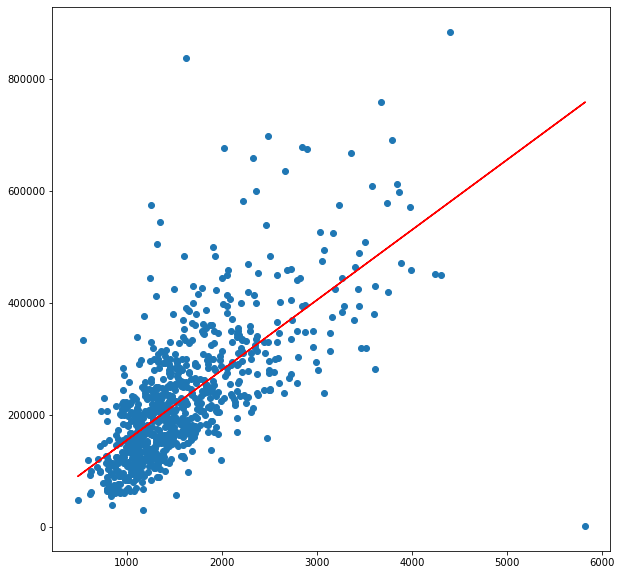

In [43]:
x = new_df['sq__ft']
y = new_df['price']

x_y_int_slope(x, y)

plt.figure(figsize=(10,10))

plt.scatter(x, y);
plt.plot(x, x_y_int_slope.linear_y_hat, c='r');


---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [44]:
types_df = pd.get_dummies(new_df['type'])

types_df.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [45]:
 new_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [46]:
types_df.drop('Condo', axis=1, inplace=True)

In [47]:
new_df = new_df.merge(types_df, left_index=True, right_index=True)

In [48]:
new_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [49]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

y = new_df['price']
X = new_df[['beds','baths','sq__ft','Multi-Family','Residential']]

lm = linear_model.LinearRegression()

model = lm.fit(X, y)

predictions = model.predict(X)

In [50]:
lm.score(X, y)
#sklearn.metrics.mean_squared_error(y, y_hat)

0.49156234738093263

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

You can use matplotlib or seaborn.

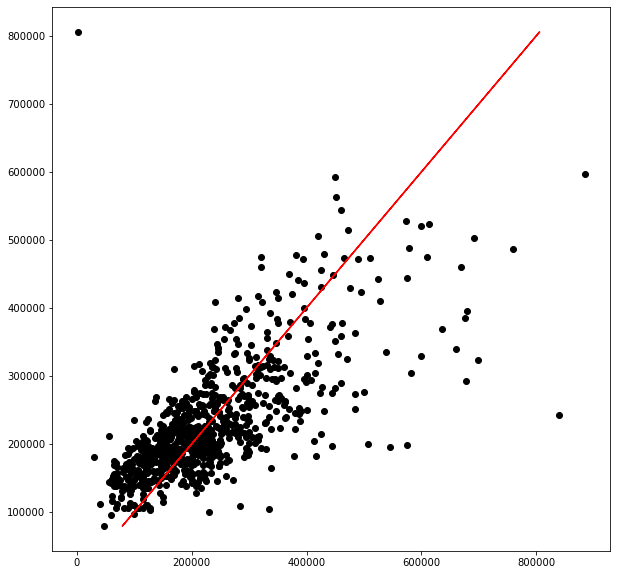

In [51]:
#x_y_int_slope(X, y)

plt.figure(figsize=(10,10))

plt.scatter(y, predictions, c='k');
plt.plot(predictions, predictions, color='r');

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*




### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

**Answer:**

Linearity - I do believe that this assumption is met; I believe that the price of a home has an approximately linear relationship with each of the six X inputs (beds, baths, sq__ft, Condo, Multi-Family, Residential).

Independence Part 2 - I do not believe this assumption is met in my model because the number of bedrooms in a house can easily influence how many bathrooms there are.



### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [52]:
def r2_adj(X, y):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    
    lr = linear_model.LinearRegression()
    model = lr.fit(X, y)
    
    r_squared = model.score(X, y)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    print("Adjusted R-squared: {}".format(adj_r_squared))
    

In [53]:
r2_adj(X, y)

Adjusted R-squared: 0.4884160747780919


### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [54]:
def regression_metrics(X, y):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    import pandas as pd
    
    linear = linear_model.LinearRegression()
    model = linear.fit(X, y)
    y_hat = model.predict(X)

    r_squared = model.score(X, y)
    mean_squared_err = metrics.mean_squared_error(y, y_hat)
    root_mean_squared_err = np.sqrt(mean_squared_err)
    mean_abs_err = metrics.mean_absolute_error(y, y_hat)
    median_abs_err = metrics.median_absolute_error(y, y_hat)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    
    print("R-squared: {}".format(r_squared))
    print("Adjusted R-squared: {}".format(adj_r_squared))
    print("Mean Squared Error: {}".format(mean_squared_err))
    print("Root Mean Squared Error: {}".format(root_mean_squared_err))
    print("Mean Absolute Error: {}".format(mean_abs_err))
    print("Median Absolute Error: {}".format(median_abs_err))

In [55]:
regression_metrics(X, y)

R-squared: 0.49156234738093263
Adjusted R-squared: 0.4884160747780919
Mean Squared Error: 7291265232.69861
Root Mean Squared Error: 85388.90579401173
Mean Absolute Error: 59105.160904657125
Median Absolute Error: 46377.350079232725


### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

**Current home price prediction model's six metrics are found directly above:**
   >-  R-squared: 0.4915623473809328
   >-  Adjusted R-squared: 0.488416074778092
   >-  Mean Squared Error: 7291265232.698609
   >-  Root Mean Squared Error: 85388.90579401172
   >-  Mean Absolute Error: 59105.16090465707
   >-  Median Absolute Error: 46377.35007923386

In [56]:
new_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


In [57]:
new_df['day_of_week'] = [_[0:3] for _ in new_df['sale_date']]

In [58]:
day_of_week_df = pd.get_dummies(new_df['day_of_week'])

In [59]:
day_of_week_df.head()

,Fri,Mon,Thu,Tue,Wed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [60]:
day_of_week_df.drop('Fri', axis=1, inplace=True)

In [61]:
new_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Multi-Family,Residential,day_of_week
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1,Wed
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1,Wed
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1,Wed
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1,Wed
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1,Wed


In [62]:
new_df = new_df.merge(day_of_week_df, left_index=True, right_index=True)

In [63]:
new_df['city'].unique()

array(['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS',
       'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT',
       'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES',
       'GOLD RIVER', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS',
       'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'LINCOLN',
       'CAMERON PARK', 'ROCKLIN', 'LOOMIS', 'AUBURN', 'EL DORADO HILLS',
       'EL DORADO', 'PENRYN', 'GRANITE BAY', 'DIAMOND SPRINGS', 'COOL',
       'WALNUT GROVE', 'SLOUGHHOUSE', 'WEST SACRAMENTO'], dtype=object)

In [64]:
cities_df = pd.get_dummies(new_df['city'])

In [65]:
cities_df.head(2)

,ANTELOPE,AUBURN,CAMERON PARK,CARMICHAEL,CITRUS HEIGHTS,COOL,DIAMOND SPRINGS,EL DORADO,EL DORADO HILLS,ELK GROVE,...,RANCHO CORDOVA,RANCHO MURIETA,RIO LINDA,ROCKLIN,ROSEVILLE,SACRAMENTO,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [66]:
cities_df.drop('ANTELOPE', axis=1, inplace=True)

In [67]:
new_df = new_df.merge(cities_df, left_index=True, right_index=True)

In [68]:
cities_df.head()

,AUBURN,CAMERON PARK,CARMICHAEL,CITRUS HEIGHTS,COOL,DIAMOND SPRINGS,EL DORADO,EL DORADO HILLS,ELK GROVE,ELVERTA,...,RANCHO CORDOVA,RANCHO MURIETA,RIO LINDA,ROCKLIN,ROSEVILLE,SACRAMENTO,SLOUGHHOUSE,WALNUT GROVE,WEST SACRAMENTO,WILTON
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
new_df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'Multi-Family',
       'Residential', 'day_of_week', 'Mon', 'Thu', 'Tue', 'Wed', 'AUBURN',
       'CAMERON PARK', 'CARMICHAEL', 'CITRUS HEIGHTS', 'COOL',
       'DIAMOND SPRINGS', 'EL DORADO', 'EL DORADO HILLS', 'ELK GROVE',
       'ELVERTA', 'FAIR OAKS', 'FOLSOM', 'GALT', 'GOLD RIVER', 'GRANITE BAY',
       'GREENWOOD', 'LINCOLN', 'LOOMIS', 'MATHER', 'MEADOW VISTA',
       'NORTH HIGHLANDS', 'ORANGEVALE', 'PENRYN', 'PLACERVILLE',
       'POLLOCK PINES', 'RANCHO CORDOVA', 'RANCHO MURIETA', 'RIO LINDA',
       'ROCKLIN', 'ROSEVILLE', 'SACRAMENTO', 'SLOUGHHOUSE', 'WALNUT GROVE',
       'WEST SACRAMENTO', 'WILTON'],
      dtype='object')

In [70]:
new_df['zip'].unique()

array([95838, 95823, 95815, 95824, 95841, 95842, 95820, 95670, 95673,
       95822, 95621, 95833, 95660, 95834, 95843, 95832, 95827, 95828,
       95758, 95626, 95825, 95835, 95624, 95632, 95826, 95608, 95662,
       95630, 95829, 95655, 95757, 95726, 95818, 95742, 95683, 95693,
       95831, 95814, 95635, 95864, 95817, 95628, 95667, 95610, 95722,
       95816, 95678, 95747, 95648, 95819, 95811, 95682, 95765, 95661,
       95650, 95821, 95603, 95762, 95677, 95623, 95663, 95746, 95619,
       95614, 95690, 95691])

In [71]:
zips_df = pd.get_dummies(new_df['zip'])

In [72]:
zips_df.columns = [str(_) for _ in zips_df.columns]

In [73]:
zips_df.drop('95838', axis=1, inplace=True)

In [74]:
new_df = new_df.merge(zips_df, left_index=True, right_index=True)

In [75]:
new_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,...,95829,95831,95832,95833,95834,95835,95841,95842,95843,95864
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,...,0,0,0,0,0,0,0,0,0,0
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,...,0,0,0,0,0,0,0,0,0,0
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,...,0,0,0,0,0,0,0,0,0,0
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,...,0,0,0,0,0,0,0,0,0,0
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,...,0,0,0,0,0,0,0,0,0,0


In [76]:
zips_df.columns.unique()

Index(['95603', '95608', '95610', '95614', '95619', '95621', '95623', '95624',
       '95626', '95628', '95630', '95632', '95635', '95648', '95650', '95655',
       '95660', '95661', '95662', '95663', '95667', '95670', '95673', '95677',
       '95678', '95682', '95683', '95690', '95691', '95693', '95722', '95726',
       '95742', '95746', '95747', '95757', '95758', '95762', '95765', '95811',
       '95814', '95815', '95816', '95817', '95818', '95819', '95820', '95821',
       '95822', '95823', '95824', '95825', '95826', '95827', '95828', '95829',
       '95831', '95832', '95833', '95834', '95835', '95841', '95842', '95843',
       '95864'],
      dtype='object')

In [81]:
y = new_df['price']
X = new_df[['beds','baths','sq__ft','Multi-Family','Residential', 'Mon', 'Thu', 'Tue', 'Wed']]

lm = linear_model.LinearRegression()

model = lm.fit(X, y)

predictions = model.predict(X)

In [82]:
regression_metrics(X, y)

R-squared: 0.5033987592325738
Adjusted R-squared: 0.49783979011950563
Mean Squared Error: 7121524817.587315
Root Mean Squared Error: 84389.12736595464
Mean Absolute Error: 58749.67116332018
Median Absolute Error: 47156.262210044195


### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

**Answer:**

At this point,my model is high in bias, seeing that it seems like a simple model.When I added another inputs to the model, the R^2 value increased, assuming that my model can improve by increasing the inputs. 